# Importing Dataset from kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"howidaabdelhalim","key":"18545d6b6c083439ab1e92b3c99baff3"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
 99% 581M/586M [00:05<00:00, 139MB/s]
100% 586M/586M [00:05<00:00, 104MB/s]


In [ ]:
!unzip -q animals10.zip

# **Important Libraries**

In [ ]:
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD , Adam
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPooling2D

# **Understanding Data**

In [ ]:
def print_images(path):
  files = os.listdir(path)
  image_files = [file for file in files if file.endswith(('.jpeg','jpg','png'))]
  fig, axs = plt.subplots(1, len(image_files[:3]), figsize=(15, 3))
  for i, image_file in enumerate(image_files[:3]):
    image_path = os.path.join(path,image_file)
    image = mpimg.imread(image_path)
    resized_image = cv2.resize(image,(100,100))
    axs[i].imshow(resized_image)
    axs[i].axis('off')
  plt.show()

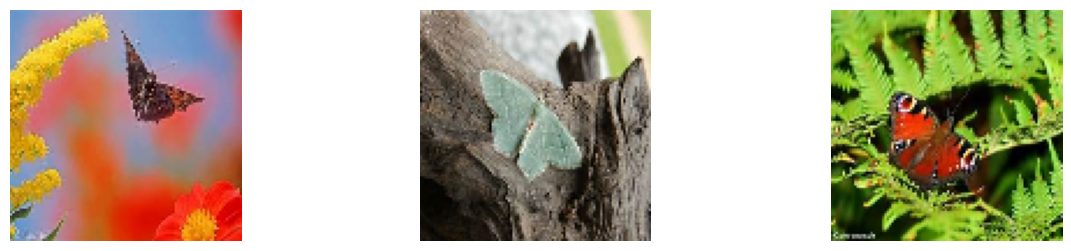

In [ ]:
print_images('/content/raw-img/farfalla')

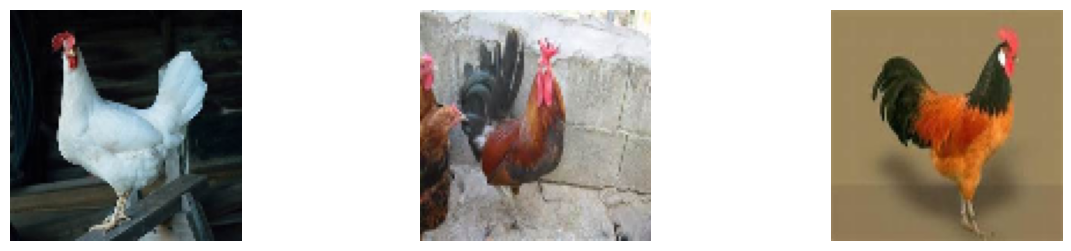

In [ ]:
print_images('/content/raw-img/gallina')

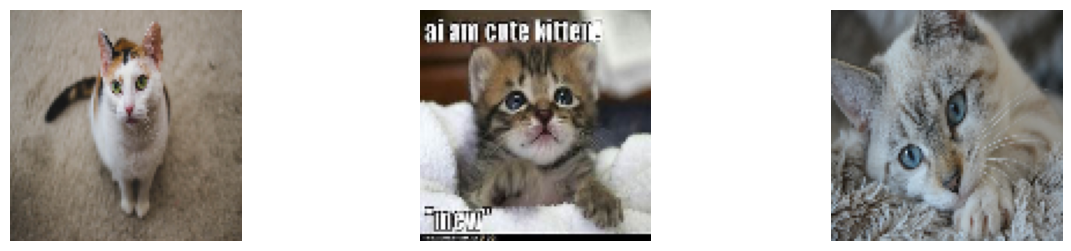

In [ ]:
print_images('/content/raw-img/gatto')

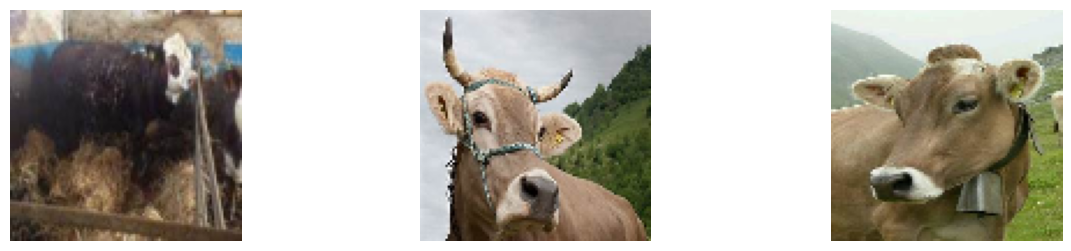

In [ ]:
print_images('/content/raw-img/mucca')

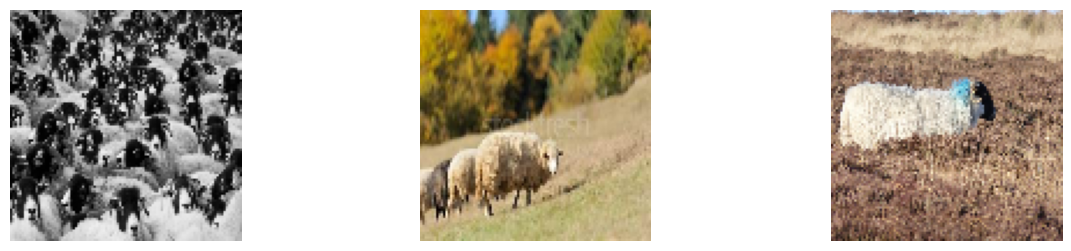

In [ ]:
print_images('/content/raw-img/pecora')

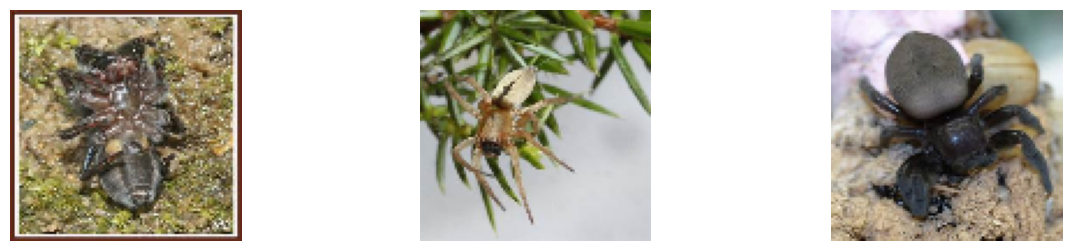

In [ ]:
print_images('/content/raw-img/ragno')

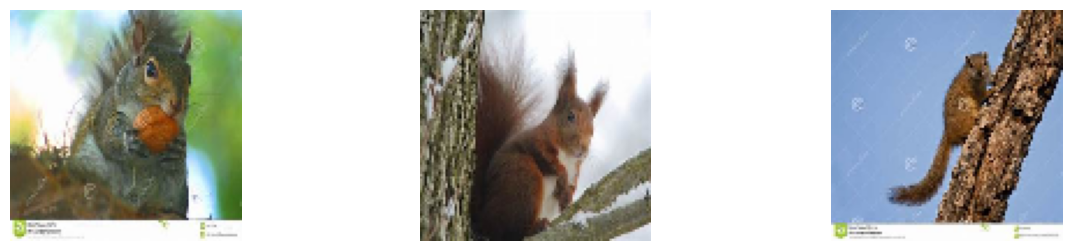

In [ ]:
print_images('/content/raw-img/scoiattolo')

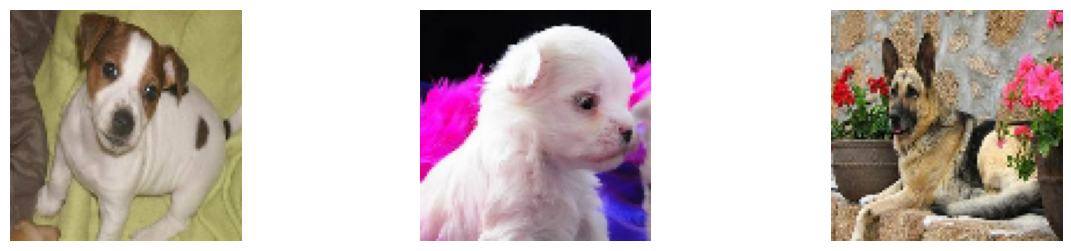

In [ ]:
print_images('/content/raw-img/cane')

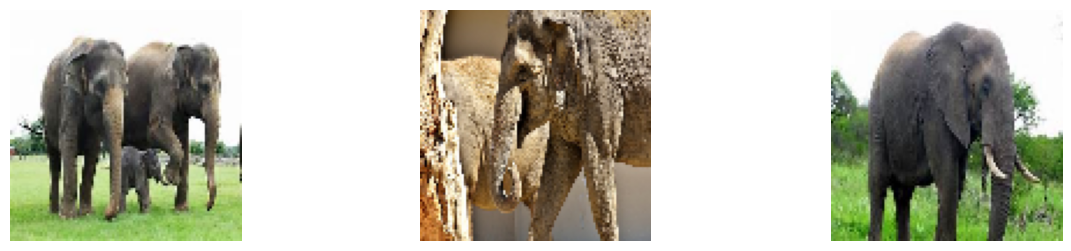

In [ ]:
print_images('/content/raw-img/elefante')

# **Data Preprocessing**

In [ ]:
!pip install keras_drop_block

  Preparing metadata (setup.py) ... done
  Created wheel for keras_drop_block: filename=keras_drop_block-0.7.0-py3-none-any.whl size=6239 sha256=bce8f8e32b5dce71024fa2292a488c271f752e0efbab19be83bc67df4141cb3c
  Stored in directory: /root/.cache/pip/wheels/0f/ec/89/c7176be72ad7a7e969adee71bcc8751e733f5b601984d1cbd9
Successfully built keras_drop_block


In [ ]:
from keras_drop_block import DropBlock2D

# **Data Splitting**

In [ ]:
training_data = ImageDataGenerator(
    rescale= 1./255,
    zoom_range = 0.2,
    horizontal_flip= True,
    vertical_flip= True,
    brightness_range = (0.2, 0.7),
    validation_split = 0.2,
)

In [ ]:
testing_data = ImageDataGenerator(
    rescale= 1./255
)

In [ ]:
data_dir = '/content/raw-img'
training_set = training_data.flow_from_directory(
    data_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training')  # set as training data

validation_set = training_data.flow_from_directory(
    data_dir,  # same directory as training data
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation')  # set as validation data



Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
testing_set = testing_data.flow_from_directory(
    "/content/drive/MyDrive/main_test_images",
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    ) # set as training data

Found 119 images belonging to 10 classes.


In [ ]:
def Get_all_classes(flow_dir_dataset):
  class_indices = flow_dir_dataset.class_indices
  class_labels = list(class_indices.keys())
  return class_labels

Get_all_classes(training_set)


['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [ ]:
Get_all_classes(validation_set)

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [ ]:
Get_all_classes(testing_set)

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'rango',
 'scoiattolo']

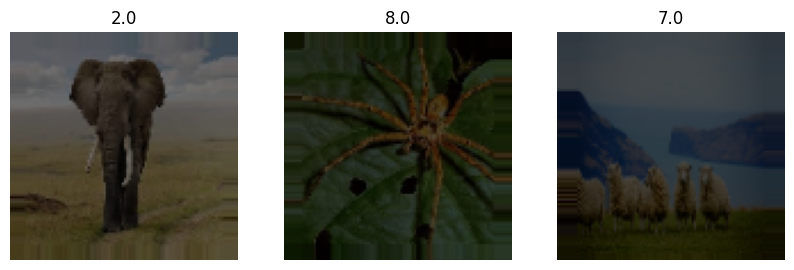

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(training_set):
    if i >= 3:
        break
    plt.subplot(1, 3, i + 1)
    plt.imshow(image[0])
    plt.title(label[0])
    plt.axis('off')
plt.show()


# modeling

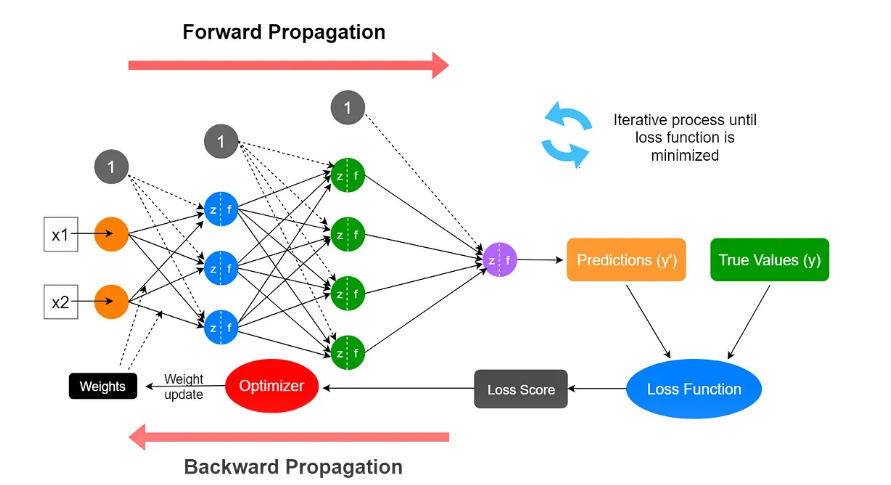

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
import visualkeras

In [ ]:

adam_histories = []
SGD_histories = []

In [ ]:
stop = EarlyStopping(patience=5)

In [ ]:
# to store loss and accuracy
evaluations = []
#evaluations = {}

predictions = []

In [ ]:
evaluations

[]

In [ ]:
import numpy as np
print("Training data shape:", training_set[0][0].shape)
print("Validation data shape:", validation_set[0][0].shape)

# Check label encoding
print("Training labels example:", training_set[0][1])
print("Validation labels example:", validation_set[0][1])

# Check label encoding consistency
training_labels = np.unique(training_set[0][1])
validation_labels = np.unique(validation_set[0][1])

if not np.array_equal(training_labels, validation_labels):
    print("Warning: Training and validation label encoding differs.")



Training data shape: (32, 100, 100, 3)
Validation data shape: (32, 100, 100, 3)
Training labels example: [2. 0. 5. 8. 1. 3. 9. 4. 1. 0. 3. 9. 2. 4. 2. 0. 1. 0. 0. 2. 5. 4. 2. 6.
 0. 2. 1. 6. 8. 0. 8. 8.]
Validation labels example: [4. 0. 8. 8. 4. 8. 9. 1. 8. 4. 4. 7. 0. 8. 6. 1. 4. 6. 6. 0. 2. 2. 3. 3.
 1. 1. 5. 8. 7. 4. 9. 3.]


In [ ]:
def save_weights(model , model_name):
  #/content/Weights_paths
  model.save_weights(f'/content/drive/MyDrive/weights_paths/{model_name}_weights.h5')

In [ ]:
# Function to Load Weights and Create Model to use it with this weights
def load_model_with_weights(model, weights_path):
  model.load_weights(weights_path)
  return model

# **Model 1**




In [ ]:
model1 = Sequential([
    # input layer
    Dense(units = 256 ,activation = 'relu' , input_shape=(100, 100, 3)),

    # hidden layer
    Dense(units = 128,activation = 'relu'),
    Dense(units = 64,activation = 'relu'),
    Dense(units = 64,activation = 'relu'),
    Dense(units = 32,activation = 'relu'),
    Flatten(),

    # output layer
    Dense(units = 10,activation = 'softmax'),
])

In [ ]:
model1.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model1.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
adam_histories.append(history)

Epoch 1/25
655/655 [==============================] - 138s 205ms/step - loss: 2.2053 - accuracy: 0.1894 - val_loss: 2.1797 - val_accuracy: 0.2194
Epoch 2/25
655/655 [==============================] - 133s 203ms/step - loss: 2.1674 - accuracy: 0.2083 - val_loss: 2.1497 - val_accuracy: 0.2253
Epoch 3/25
655/655 [==============================] - 133s 204ms/step - loss: 2.1376 - accuracy: 0.2315 - val_loss: 2.1080 - val_accuracy: 0.2525
Epoch 4/25
655/655 [==============================] - 134s 204ms/step - loss: 2.0896 - accuracy: 0.2526 - val_loss: 2.0684 - val_accuracy: 0.2557
Epoch 5/25
655/655 [==============================] - 134s 204ms/step - loss: 2.0683 - accuracy: 0.2611 - val_loss: 2.0633 - val_accuracy: 0.2706
Epoch 6/25
655/655 [==============================] - 131s 200ms/step - loss: 2.0530 - accuracy: 0.2679 - val_loss: 2.0273 - val_accuracy: 0.2827
Epoch 7/25
655/655 [==============================] - 134s 204ms/step - loss: 2.0430 - accuracy: 0.2729 - val_loss: 2.0372 -

In [ ]:
save_weights(model1 , "model1")

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100, 100, 256)     1024      
                                                                 
 dense_7 (Dense)             (None, 100, 100, 128)     32896     
                                                                 
 dense_8 (Dense)             (None, 100, 100, 64)      8256      
                                                                 
 dense_9 (Dense)             (None, 100, 100, 64)      4160      
                                                                 
 dense_10 (Dense)            (None, 100, 100, 32)      2080      
                                                                 
 flatten_1 (Flatten)         (None, 320000)            0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [ ]:
evaluation = model1.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 1s 106ms/step - loss: 2.0438 - accuracy: 0.2857


In [ ]:
evaluations

[[2.043815851211548, 0.2857142984867096]]

In [ ]:
prediction = model1.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 111ms/step


In [ ]:
test_labels = testing_set.labels

In [ ]:
class_labels = Get_all_classes(training_set)

In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))

              precision    recall  f1-score   support

        cane       0.36      0.07      0.12        57
     cavallo       0.00      0.00      0.00         4
    elefante       0.00      0.00      0.00         4
    farfalla       0.12      0.12      0.12         8
     gallina       0.00      0.00      0.00        13
       gatto       0.00      0.00      0.00         1
       mucca       0.00      0.00      0.00         7
      pecora       0.07      1.00      0.12         1
       ragno       0.24      0.17      0.20        24
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.08       119
   macro avg       0.08      0.14      0.06       119
weighted avg       0.23      0.08      0.11       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


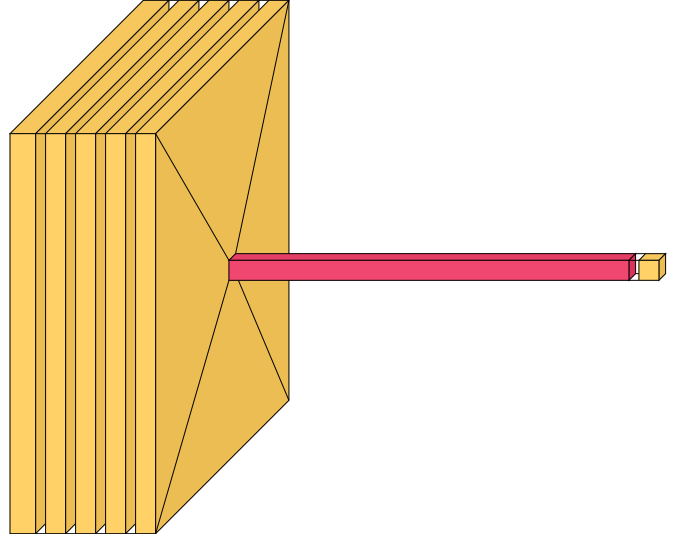

In [ ]:
visualkeras.layered_view(model1)


# **Model 2**



In [ ]:
model2 = Sequential([
    # input layer
    Dense(units=300, activation='relu', input_shape=(100, 100, 3)),

    # hidden layer
    Dense(units=128, activation='relu'),
    Dense(units=32, activation='relu'),
    Dropout(0.01),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dropout(0.01),
    Flatten(),
    Dense(units=16, activation='relu'),
    Dropout(0.01),
    Flatten(),

    # output layer
    Dense(units=10, activation='softmax'),
])

In [ ]:
model2.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model2.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
adam_histories.append(history)

Epoch 1/25
655/655 [==============================] - 135s 198ms/step - loss: 2.2300 - accuracy: 0.1885 - val_loss: 2.1940 - val_accuracy: 0.1984
Epoch 2/25
655/655 [==============================] - 132s 202ms/step - loss: 2.1471 - accuracy: 0.2152 - val_loss: 2.1529 - val_accuracy: 0.2313
Epoch 3/25
655/655 [==============================] - 132s 201ms/step - loss: 2.1076 - accuracy: 0.2363 - val_loss: 2.1148 - val_accuracy: 0.2529
Epoch 4/25
655/655 [==============================] - 130s 198ms/step - loss: 2.0913 - accuracy: 0.2443 - val_loss: 2.1231 - val_accuracy: 0.2439
Epoch 5/25
655/655 [==============================] - 132s 202ms/step - loss: 2.0738 - accuracy: 0.2501 - val_loss: 2.0586 - val_accuracy: 0.2630
Epoch 6/25
655/655 [==============================] - 131s 200ms/step - loss: 2.0600 - accuracy: 0.2568 - val_loss: 2.0393 - val_accuracy: 0.2747
Epoch 7/25
655/655 [==============================] - 131s 200ms/step - loss: 2.0548 - accuracy: 0.2608 - val_loss: 2.0648 -

In [ ]:
save_weights(model2 , "model2")

In [ ]:
def save_weights(model , model_name):
  #/content/Weights_paths
  model.save_weights(f'/content/drive/MyDrive/weights_paths{model_name}_weights.h5')

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 100, 300)     1200      
                                                                 
 dense_1 (Dense)             (None, 100, 100, 128)     38528     
                                                                 
 dense_2 (Dense)             (None, 100, 100, 32)      4128      
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 dense_3 (Dense)             (None, 100, 100, 32)      1056      
                                                                 
 dropout_1 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 dense_4 (Dense)             (None, 100, 100, 32)      1

In [ ]:
evaluation = model2.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 32s 11s/step - loss: 2.2009 - accuracy: 0.1681


In [ ]:
evaluations

[[2.200937032699585, 0.16806723177433014]]

In [ ]:
prediction = model2.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 113ms/step


In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))

              precision    recall  f1-score   support

        cane       0.55      0.09      0.16        64
     cavallo       0.00      0.00      0.00         0
    elefante       0.00      0.00      0.00         0
    farfalla       0.00      0.00      0.00         6
     gallina       0.22      0.11      0.14        19
       gatto       0.00      0.00      0.00         0
       mucca       0.00      0.00      0.00         0
      pecora       0.00      0.00      0.00         0
       ragno       0.18      0.10      0.13        30
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.09       119
   macro avg       0.09      0.03      0.04       119
weighted avg       0.37      0.09      0.14       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


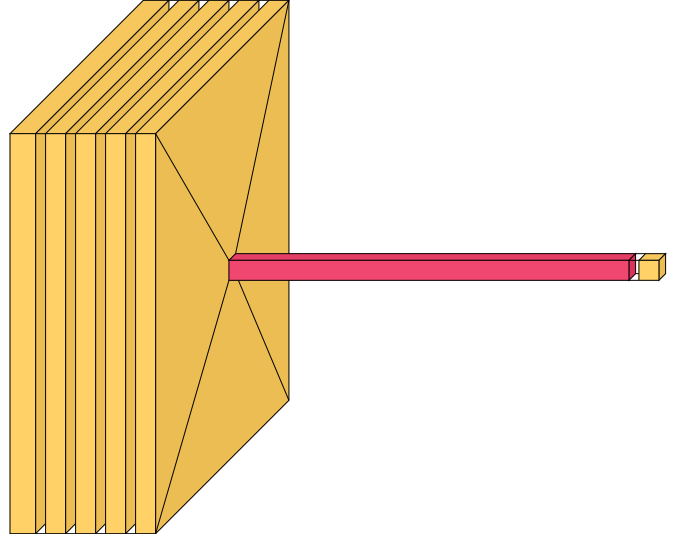

In [ ]:
visualkeras.layered_view(model2)


# **Model 3**



In [ ]:
model3 = Sequential([
    # input layer
    Dense(units=300, activation='relu', input_shape=(100, 100, 3)),

    # hidden layer
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.05),
    Dense(units=32, activation='relu'),
    Dropout(0.02),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=8, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=2, activation='relu'),
    Flatten(),

    # output layer
    Dense(10, activation='softmax')
])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 100, 300)     1200      
                                                                 
 dense_1 (Dense)             (None, 100, 100, 256)     77056     
                                                                 
 dense_2 (Dense)             (None, 100, 100, 128)     32896     
                                                                 
 dense_3 (Dense)             (None, 100, 100, 32)      4128      
                                                                 
 dense_4 (Dense)             (None, 100, 100, 64)      2112      
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 dense_5 (Dense)             (None, 100, 100, 32)      2

In [ ]:
model3.compile(optimizer= "SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model3.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
SGD_histories.append(history)

Epoch 1/25
655/655 [==============================] - 145s 215ms/step - loss: 2.2235 - accuracy: 0.1817 - val_loss: 2.2157 - val_accuracy: 0.1858
Epoch 2/25
655/655 [==============================] - 149s 227ms/step - loss: 2.2180 - accuracy: 0.1851 - val_loss: 2.2121 - val_accuracy: 0.1858
Epoch 3/25
655/655 [==============================] - 138s 211ms/step - loss: 2.2154 - accuracy: 0.1871 - val_loss: 2.2137 - val_accuracy: 0.1843
Epoch 4/25
655/655 [==============================] - 138s 211ms/step - loss: 2.2145 - accuracy: 0.1855 - val_loss: 2.2111 - val_accuracy: 0.1843
Epoch 5/25
655/655 [==============================] - 140s 214ms/step - loss: 2.2140 - accuracy: 0.1863 - val_loss: 2.2233 - val_accuracy: 0.1843
Epoch 6/25
655/655 [==============================] - 137s 210ms/step - loss: 2.2110 - accuracy: 0.1873 - val_loss: 2.2000 - val_accuracy: 0.2099
Epoch 7/25
655/655 [==============================] - 139s 212ms/step - loss: 2.1963 - accuracy: 0.1940 - val_loss: 2.1832 -

In [ ]:
save_weights(model3, "model3")

In [ ]:
evaluation = model3.evaluate(testing_set)
evaluations.append(evaluation)

4/4 [==============================] - 53s 17s/step - loss: 2.3102 - accuracy: 0.1765


In [ ]:
evaluations

[[2.310187816619873, 0.1764705926179886]]

In [ ]:
prediction = model3.predict(testing_set)
prediction = np.argmax(prediction, axis=1)

predictions.append(prediction)

4/4 [==============================] - 1s 192ms/step


In [ ]:
test_labels = testing_set.labels


In [ ]:
class_labels = Get_all_classes(training_set)

In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))

              precision    recall  f1-score   support

        cane       0.27      0.08      0.12        39
     cavallo       0.11      0.09      0.10        11
    elefante       0.00      0.00      0.00         0
    farfalla       0.00      0.00      0.00         5
     gallina       0.00      0.00      0.00         2
       gatto       0.00      0.00      0.00         0
       mucca       0.00      0.00      0.00         0
      pecora       0.07      0.33      0.11         3
       ragno       0.41      0.12      0.18        59
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.10       119
   macro avg       0.09      0.06      0.05       119
weighted avg       0.31      0.10      0.14       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


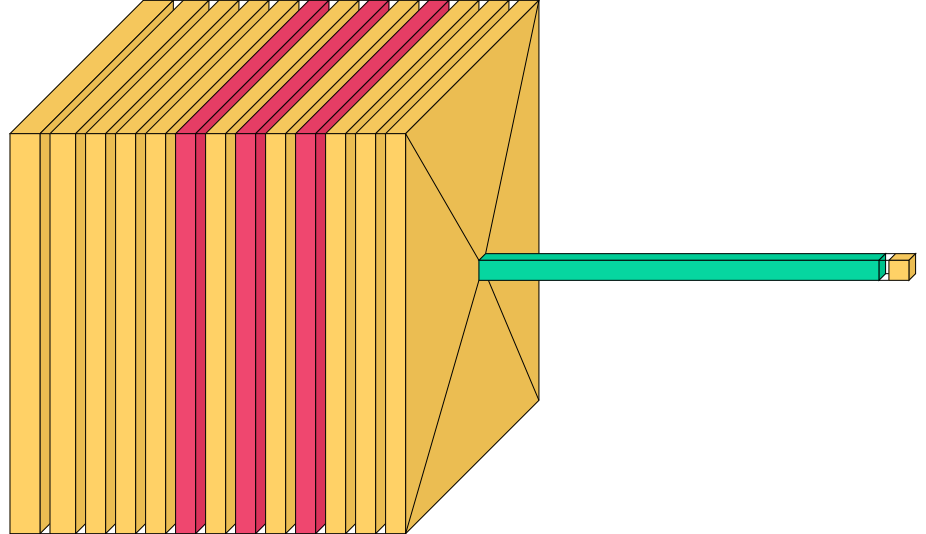

In [ ]:
visualkeras.layered_view(model3)


# **Model 4**



In [ ]:
model4 = Sequential([
    # input layer
    Dense(units=315, activation='relu', input_shape=(100, 100, 3)),

    # hidden layer
    Dense(units=300, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.02),
    Dense(units=200, activation='relu'),
    Dropout(0.02),
    Dense(units=32, activation='relu'),
    Dense(units=150, activation='relu'),
    Dense(units=128, activation='relu'),
    Flatten(),

    # output layer
    Dense(10, activation='softmax')
])

In [ ]:
model4.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model4.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
SGD_histories.append(history)


Epoch 1/25
655/655 [==============================] - 237s 358ms/step - loss: 2.2150 - accuracy: 0.1877 - val_loss: 2.1943 - val_accuracy: 0.2041
Epoch 2/25
655/655 [==============================] - 221s 338ms/step - loss: 2.1793 - accuracy: 0.2031 - val_loss: 2.1647 - val_accuracy: 0.2185
Epoch 3/25
655/655 [==============================] - 220s 336ms/step - loss: 2.1529 - accuracy: 0.2136 - val_loss: 2.1453 - val_accuracy: 0.2246
Epoch 4/25
655/655 [==============================] - 219s 335ms/step - loss: 2.1385 - accuracy: 0.2237 - val_loss: 2.1293 - val_accuracy: 0.2462
Epoch 5/25
655/655 [==============================] - 220s 335ms/step - loss: 2.1258 - accuracy: 0.2292 - val_loss: 2.1402 - val_accuracy: 0.2192
Epoch 6/25
655/655 [==============================] - 234s 358ms/step - loss: 2.1058 - accuracy: 0.2423 - val_loss: 2.1019 - val_accuracy: 0.2494
Epoch 7/25
655/655 [==============================] - 222s 338ms/step - loss: 2.0834 - accuracy: 0.2542 - val_loss: 2.0522 -

In [ ]:
save_weights(model4 , "model4")


In [ ]:
model4.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100, 100, 315)     1260      
                                                                 
 dense_12 (Dense)            (None, 100, 100, 300)     94800     
                                                                 
 dense_13 (Dense)            (None, 100, 100, 400)     120400    
                                                                 
 dense_14 (Dense)            (None, 100, 100, 64)      25664     
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 64)      0         
                                                                 
 dense_15 (Dense)            (None, 100, 100, 200)     13000     
                                                                 
 dropout_4 (Dropout)         (None, 100, 100, 200)    

In [ ]:
evaluation = model4.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 1s 145ms/step - loss: 2.0280 - accuracy: 0.3277


In [ ]:
evaluations


[[2.310187816619873, 0.1764705926179886],
 [2.028017282485962, 0.32773110270500183]]

In [ ]:
prediction = model4.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 138ms/step


In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))


              precision    recall  f1-score   support

        cane       0.27      0.15      0.19        20
     cavallo       0.11      0.20      0.14         5
    elefante       0.00      0.00      0.00         3
    farfalla       0.12      0.09      0.11        11
     gallina       0.11      0.14      0.12         7
       gatto       0.06      0.14      0.09         7
       mucca       0.25      0.30      0.27        10
      pecora       0.27      0.36      0.31        11
       ragno       0.35      0.13      0.19        45
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.17       119
   macro avg       0.16      0.15      0.14       119
weighted avg       0.25      0.17      0.19       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


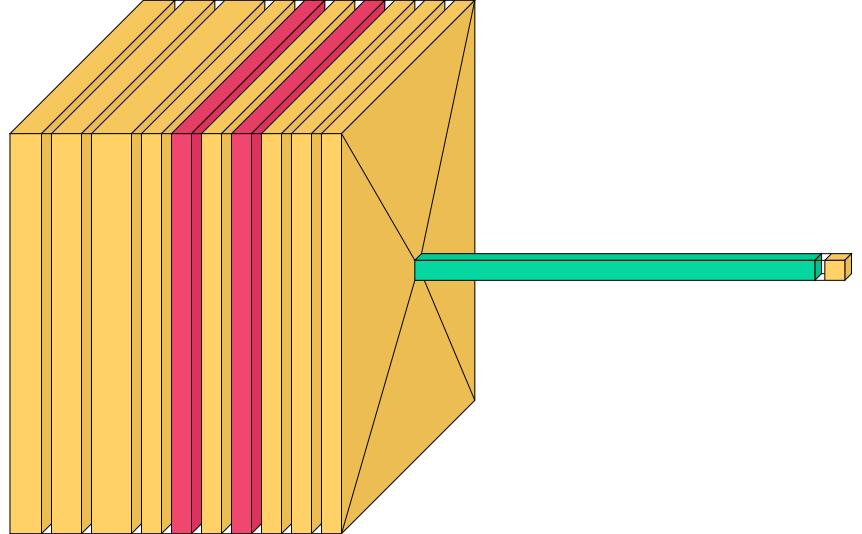

In [ ]:
visualkeras.layered_view(model4)

# **Model 5**

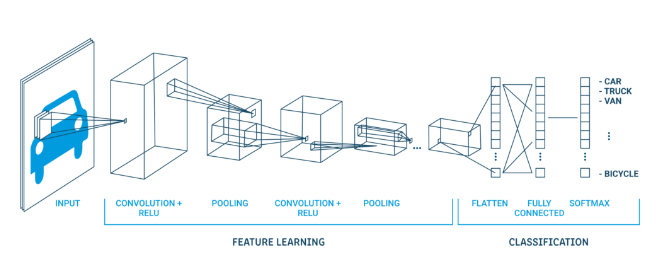

In [ ]:
model5_dropblock = Sequential([
    Conv2D(filters = 64, kernel_size=3, strides=(1, 1),  padding="same", activation = 'relu', input_shape = (100, 100, 3)),
    MaxPool2D(pool_size = (2, 2), strides= (2, 2)),

    Conv2D(filters = 32, kernel_size=3, strides=(1, 1),  padding="same", activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides= (2, 2)),

    DropBlock2D(block_size=7, keep_prob= 0.8),


    Dense(units = 128, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Flatten(),

    # output layer
    Dense(units = 10, activation = 'sigmoid')

])

In [ ]:
model5_dropblock.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model5_dropblock.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
adam_histories.append(history)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)


655/655 [==============================] - 148s 217ms/step - loss: 2.0324 - accuracy: 0.2800 - val_loss: 1.8147 - val_accuracy: 0.3735
Epoch 2/25
655/655 [==============================] - 117s 179ms/step - loss: 1.7873 - accuracy: 0.3773 - val_loss: 1.7116 - val_accuracy: 0.3997
Epoch 3/25
655/655 [==============================] - 117s 179ms/step - loss: 1.6662 - accuracy: 0.4226 - val_loss: 1.6637 - val_accuracy: 0.4184
Epoch 4/25
655/655 [==============================] - 145s 221ms/step - loss: 1.5832 - accuracy: 0.4559 - val_loss: 1.5358 - val_accuracy: 0.4660
Epoch 5/25
655/655 [==============================] - 130s 198ms/step - loss: 1.5333 - accuracy: 0.4755 - val_loss: 1.4924 - val_accuracy: 0.4832
Epoch 6/25
655/655 [==============================] - 121s 185ms/step - loss: 1.4763 - accuracy: 0.4926 - val_loss: 1.4415 - val_accuracy: 0.5052
Epoch 7/25
655/655 [==============================] - 125s 191ms/step - loss: 1.4354 - accuracy: 0.5102 - val_loss: 1.4390 - val_accura

In [ ]:
save_weights(model5_dropblock , "model5_dropblock")


In [ ]:
model5_dropblock.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 drop_block2d (DropBlock2D)  (None, 25, 25, 32)        1250      
                                                                 
 dense_7 (Dense)             (None, 25, 25, 128)      

In [ ]:
evaluation = model5_dropblock.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 1s 193ms/step - loss: 1.7199 - accuracy: 0.5042


In [ ]:
evaluations


[[2.200937032699585, 0.16806723177433014],
 [1.7199199199676514, 0.5042017102241516]]

In [ ]:
prediction = model5_dropblock.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 63ms/step


In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))


              precision    recall  f1-score   support

        cane       0.00      0.00      0.00        16
     cavallo       0.22      0.22      0.22         9
    elefante       0.11      0.11      0.11         9
    farfalla       0.12      0.06      0.08        16
     gallina       0.22      0.11      0.15        18
       gatto       0.12      0.22      0.16         9
       mucca       0.17      0.22      0.19         9
      pecora       0.13      0.25      0.17         8
       ragno       0.00      0.00      0.00        14
  scoiattolo       0.15      0.18      0.17        11

    accuracy                           0.12       119
   macro avg       0.13      0.14      0.13       119
weighted avg       0.12      0.12      0.11       119



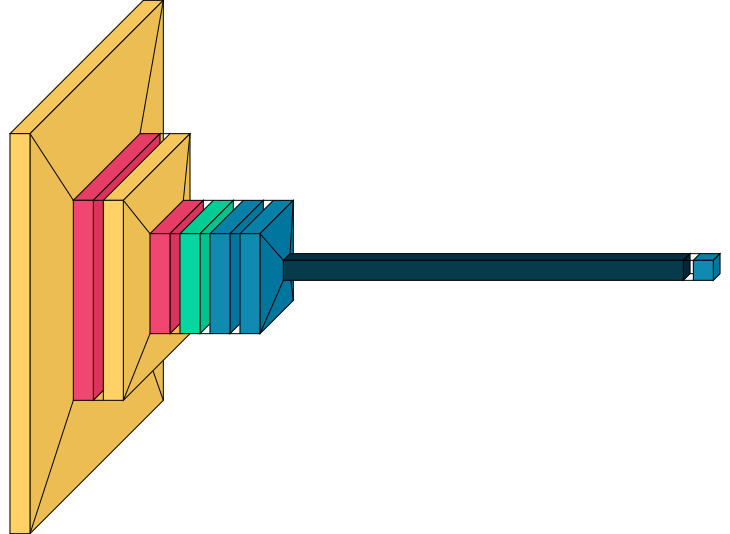

In [ ]:
visualkeras.layered_view(model5_dropblock)

# **Model 6**

In [ ]:
model6 = Sequential([
    # input layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),

    # hidden layers
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.02),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.02),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),

    # flatten before dense layers
    Flatten(),
    Dense(units=128, activation='relu'),

    # output layer
    Dense(10, activation='softmax')
])

In [ ]:
model6.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model6.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
adam_histories.append(history)

Epoch 1/25
655/655 [==============================] - 134s 201ms/step - loss: 2.2083 - accuracy: 0.1832 - val_loss: 2.2079 - val_accuracy: 0.1858
Epoch 2/25
655/655 [==============================] - 131s 199ms/step - loss: 2.2083 - accuracy: 0.1819 - val_loss: 2.2078 - val_accuracy: 0.1858
Epoch 3/25
655/655 [==============================] - 129s 197ms/step - loss: 2.2083 - accuracy: 0.1837 - val_loss: 2.2075 - val_accuracy: 0.1843
Epoch 4/25
426/655 [==================>...........] - ETA: 37s - loss: 2.2068 - accuracy: 0.1842

In [ ]:
save_weights(model6 , "model6")


In [ ]:
model6.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 94, 94, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 47, 47, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 128)       73856     
                                                      

In [ ]:
evaluation = model6.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 26s 9s/step - loss: 2.3924 - accuracy: 0.1429


In [ ]:
evaluations


[[2.392402410507202, 0.1428571492433548]]

In [ ]:
prediction = model6.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 96ms/step


In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))

              precision    recall  f1-score   support

        cane       0.00      0.00      0.00         0
     cavallo       0.00      0.00      0.00         0
    elefante       0.00      0.00      0.00         0
    farfalla       0.00      0.00      0.00         0
     gallina       0.00      0.00      0.00         0
       gatto       0.00      0.00      0.00         0
       mucca       0.00      0.00      0.00         0
      pecora       0.00      0.00      0.00         0
       ragno       1.00      0.14      0.25       119
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.14       119
   macro avg       0.10      0.01      0.03       119
weighted avg       1.00      0.14      0.25       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


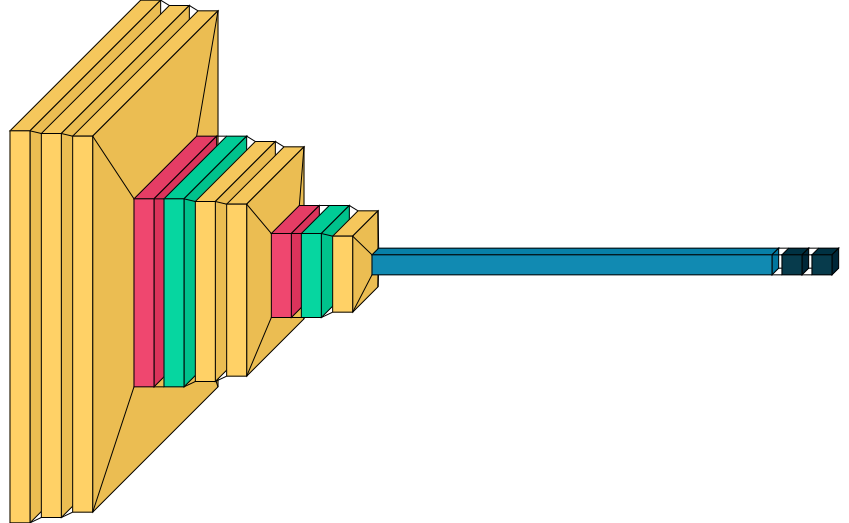

In [ ]:
visualkeras.layered_view(model6)





# **Model 7**

In [ ]:
model7 = Sequential([
    # input layer
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(100,100,3)),

    # hidden layer
    Conv2D(filters=128, kernel_size=(3,3)),
    Dense(300, activation='relu'),
    Dense(400, activation='relu'),
    MaxPool2D(pool_size = (2, 2), strides= (2, 2)),
    Conv2D(filters=128, kernel_size=(3,3)),
    Dense(64, activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3)),
    MaxPool2D(pool_size = (2, 2), strides= (2, 2)),
    Dropout(0.02),
    Dense(32, activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3)),
    MaxPool2D(pool_size = (2, 2), strides= (2, 2)),
    Dense(150, activation='relu'),
    Dense(128, activation='relu'),
    Flatten(),

    # output layer
    Dense(10, activation='softmax')
])

In [ ]:
model7.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model7.fit(x = training_set, validation_data= validation_set, epochs = 25, callbacks = stop)
adam_histories.append(history)


Epoch 1/25
655/655 [==============================] - 196s 279ms/step - loss: 2.2154 - accuracy: 0.1855 - val_loss: 2.2140 - val_accuracy: 0.1858
Epoch 2/25
655/655 [==============================] - 171s 261ms/step - loss: 2.2111 - accuracy: 0.1849 - val_loss: 2.2083 - val_accuracy: 0.1843
Epoch 3/25
655/655 [==============================] - 170s 260ms/step - loss: 2.2112 - accuracy: 0.1845 - val_loss: 2.2155 - val_accuracy: 0.1843
Epoch 4/25
655/655 [==============================] - 171s 261ms/step - loss: 2.2102 - accuracy: 0.1827 - val_loss: 2.2090 - val_accuracy: 0.1843
Epoch 5/25
655/655 [==============================] - 173s 263ms/step - loss: 2.2096 - accuracy: 0.1850 - val_loss: 2.2128 - val_accuracy: 0.1858
Epoch 6/25
655/655 [==============================] - 170s 259ms/step - loss: 2.2099 - accuracy: 0.1857 - val_loss: 2.2080 - val_accuracy: 0.1843
Epoch 7/25
655/655 [==============================] - 172s 262ms/step - loss: 2.2092 - accuracy: 0.1827 - val_loss: 2.2079 -

In [ ]:
save_weights(model7 , "model7")

In [ ]:
model7.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 dense (Dense)               (None, 96, 96, 300)       38700     
                                                                 
 dense_1 (Dense)             (None, 96, 96, 400)       120400    
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 400)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       460928    
                                                        

In [ ]:
evaluation = model7.evaluate(testing_set ,batch_size=32)
evaluations.append(evaluation)

4/4 [==============================] - 71s 24s/step - loss: 2.3695 - accuracy: 0.0924


In [ ]:
evaluations


In [ ]:
prediction = model7.predict(testing_set ,batch_size=32)
prediction = np.argmax(prediction, axis=1)
predictions.append(prediction)

4/4 [==============================] - 1s 107ms/step


In [ ]:
print(classification_report(prediction, test_labels, target_names=class_labels))


              precision    recall  f1-score   support

        cane       1.00      0.09      0.17       119
     cavallo       0.00      0.00      0.00         0
    elefante       0.00      0.00      0.00         0
    farfalla       0.00      0.00      0.00         0
     gallina       0.00      0.00      0.00         0
       gatto       0.00      0.00      0.00         0
       mucca       0.00      0.00      0.00         0
      pecora       0.00      0.00      0.00         0
       ragno       0.00      0.00      0.00         0
  scoiattolo       0.00      0.00      0.00         0

    accuracy                           0.09       119
   macro avg       0.10      0.01      0.02       119
weighted avg       1.00      0.09      0.17       119



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


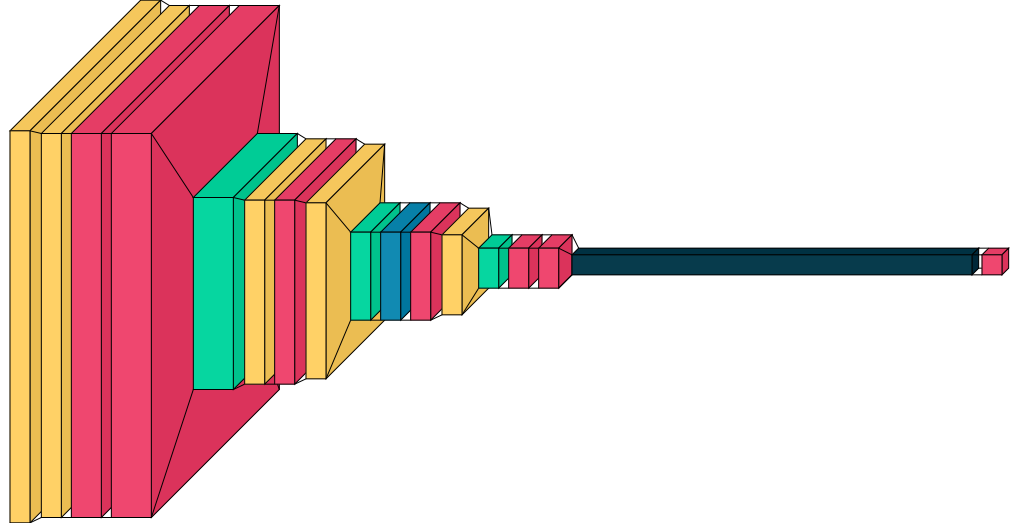

In [ ]:
visualkeras.layered_view(model7)

# **Models Visualizations**

In [ ]:
# apply adam optmizer on all models
# for model in models:
#     model.compile(optimizer=Adam_OPT, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
#     history = model.fit(x = training_set, validation_data= validation_set, epochs = 50, callbacks = stop)
#     adam_histories.append(history)

In [ ]:
# apply SGD optimizer on all models
# for model in models:
#     model.compile(optimizer= SGD_OPT, loss='categorical_crossentropy', metrics=['accuracy'])
#     history = model.fit(x=training_set, validation_data=validation_set, epochs=50, callbacks=stop)
#     SGD_histories.append(history)

In [ ]:
adam_names = [Model1, Model2],model6 , model7
SGD_names = [Model3, Model4, model5_dropblock ]

In [ ]:
def plot_training_history(histories, names):
    plt.figure(figsize=(12, 8))
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=name + ' Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=name + ' Training Loss')
        plt.plot(history.history['val_loss'], label=name + ' Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [ ]:
plot_training_history(adam_histories, adam_names)
plot_training_history(SGD_histories, SGD_names)

In [ ]:
# Evaluate each model on the test set
# evaluations = []
# predictions = []
# models = [model1, model2, model3 ,model4 , model5_dropblock ]

# for model in models:
#     evaluation = model.evaluate(testing_set)
#     evaluations.append(evaluation)
#     prediction = model.predict(testing_set)
#     predictions.append(prediction)


In [ ]:
# # Visualize each model layers
# for model in models:
#     visualkeras.layered_view(model)
#     model.summary()

In [ ]:
# # Save Weights of Each Model
# def save_weights(models):
#   for i, model in enumerate(models):
#       #/content/Weights_paths
#       model.save_weights(f'/content/Weights_paths/model{i}_weights.h5')

# save_weights(models)

In [ ]:
# # Function to Load Weights and Create Model to use it with this weights
# def load_model_with_weights(model, weights_path):
#     for model in models:
#       model.load_weights(weights_path)
#       return model

# load_model_with_weights(models, '/content/Weights_paths')

# **Deployment**

In [ ]:
class_labels = Get_all_classes(training_set)
class_labels

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [ ]:
import os

def get_original_class(image_path):
    # Extract class label from image path
    class_label = os.path.basename(os.path.dirname(image_path))
    return class_label

# Example usage
image_path = '/content/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'
original_class = get_original_class(image_path)
print("Original Class:", original_class)

Original Class: cane


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf

def deployment_function(image_path, model, class_labels, weights_paths):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict with each model
    original_class = get_original_class(image_path)
    plt.imshow(img)
    plt.title(f"Original Class: {original_class}")
    plt.show()

    # Load model architecture

    model.load_weights(weights_paths)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
        # Print the predictions
    print(f"Model: {model.name}, Predicted Class: {class_labels[predicted_class_idx]}")
    plt.imshow(img)
    plt.title(f"Predicted Class: {class_labels[predicted_class_idx]}")
    plt.show()


In [ ]:
# Example usage
image_path = '//content/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg'
models = [ model5_dropblock]

#models = [model1, model2, model3, model4, model5_dropblock]
class_labels = Get_all_classes(training_set)
weights_paths = '/content/weights_pathsmodel5_dropblock_weights.h5'



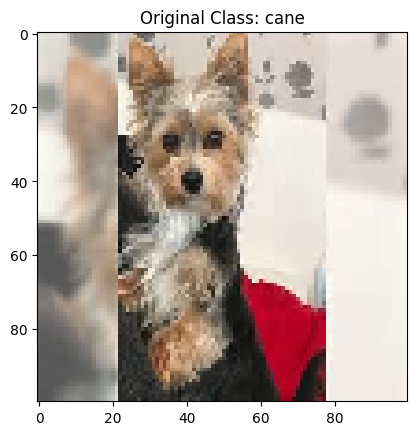

1/1 [==============================] - 0s 42ms/step
Model: sequential_2, Predicted Class: cane


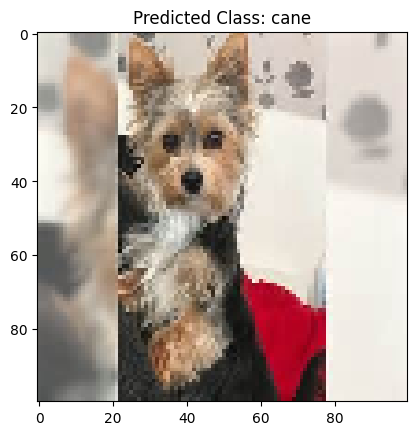

In [ ]:
import tensorflow as tf
deployment_function(image_path, model5_dropblock, class_labels, weights_paths)